# **Supporting Vector Machine**

Meng Chen, PhD, Data Science Fellow at Insight Data Science

---
## **Summary**
to be added ..
    
## **References**
1. VanderPlas, J. 2017. Python Data Science Handbook. O'Reily Inc.
2. Goodfellow, I, Bengio, Y., Courville, Aaron. 2016. Deep learning. The MIT Press.

## **Concept**
**A simple version** (Python Machine Learning Cookbook, 2018 ... maybe not this one)\
To understand support vector machines, we must understand hyperplanes. Formally, a hyperplane is an `n–1` subspace in an `n`-dimensional space. While that sounds complex, it actually is pretty simple. For example, if we wanted to divide a two-dimensional space, we’d use a one-dimensional hyperplane (i.e., a line). If we wanted to divide a three-dimensional space, we’d use a two-dimensional hyperplane (i.e., a flat piece of paper or a bed sheet). A hyperplane is simply a generalization of that concept into n dimensions.
Support vector machines classify data by finding the hyperplane that maximizes the margin between the classes in the training data. In a two-dimensional example with two classes, we can think of a hyperplane as the widest straight “band” (i.e., line with margins) that separates the two classes.\
\
**A thorough version** (Deep learning, 2016)\
One of the most influential approaches to supervised learning is the support vector machine (Boser et al., 1992; Cortes and Vapnik, 1995). This model is similar to logistic regression in that it is driven by a linear function $w^⊤x + b$. Unlike logistic regression, the support vector machine does not provide probabilities, **but only outputs a class identity**. The SVM predicts that the positive class is present when $w^⊤x + b$ is positive. Likewise, it predicts that the negative class is present when $w^⊤x + b$ is negative.\
\
    One key innovation associated with support vector machines is the **kernel trick**. The kernel trick consists of observing that many machine learning algorithms can be written exclusively in terms of dot products between examples. For example, it can be shown that the linear function used by the support vector machine can be re-written as
    
$$w^Tx + b = b + \sum_{i=1}^{m}\alpha_ix^Tx^{(i)}$$

where $x^{(i)}$a training example, and α is a vector of coefficients. Rewriting the learning algorithm this way enables us to replace x with the output of a given feature function $φ(x)$ and the dot product with a function $k(x, x^{(i)}) = φ(x) · φ(x^{(i)})$ called a **kernel**. The · operator represents an inner product analogous to $φ(x)^⊤φ(x^{(i)})$. For some feature spaces, we may not use literally the vector inner product. In some infinite dimensional spaces, we need to use other kinds of inner products, for example, inner products based on integration rather than summation. A complete development of these kinds of inner products is beyond the scope of this book.
After replacing dot products with kernel evaluations, we can make predictions using the function\
    
$$f(x) = b + 􏰎\sum_i{α_i}k(x, x^{(i)})$$

This function is nonlinear with respect to x, but the relationship between $φ(x)$ and $f(x)$ is linear. Also, the relationship between α and $f(x)$ is linear. The kernel-based function is exactly equivalent to preprocessing the data by applying $φ(x)$ to all inputs, then learning a linear model in the new transformed space.
The kernel trick is powerful for two reasons. **First**, it enables us to learn models that are nonlinear as a function of x using convex optimization techniques that are guaranteed to converge efficiently. This is possible because we consider $φ$ fixed and optimize only α, that is, the optimization algorithm can view the decision function as being linear in a different space. **Second**, the kernel function k often admits an implementation that is significantly more computationally efficient than naively constructing two $φ(x)$ vectors and explicitly taking their dot product.\
\
In some cases, $φ(x)$ can even be infinite dimensional, which would result in an infinite computational cost for the naive, explicit approach. In many cases, $k(x,x′)$ is a nonlinear, tractable function of x even when $φ(x)$ is intractable. As an example of an infinite-dimensional feature space with a tractable kernel, we construct a feature mapping $φ(x)$ over the nonnegative integers $x$. Suppose that this mapping returns a vector containing x ones followed by infinitely many zeros. We can write a kernel function $k(x, x^{(i)}) = min(x, x^{(i)})$ that is exactly equivalent to the corresponding infinite-dimensional dot product.\
\
 The most commonly used kernel is the **Gaussian kernel**,\
\
$$k(u, v) = N (u − v; 0, σ^2I)$$
\
where $N(x;μ,Σ)$ is the standard normal density. This kernel is also known as the **radial basis function (RBF)** kernel, because its value decreases along lines in $v$ space radiating outward from $u$. The Gaussian kernel corresponds to a dot product in an infinite-dimensional space, but the derivation of this space is less straightforward than in our example of the min kernel over the integers.\
\
We can think of the Gaussian kernel as performing a kind of **template matching**. A training example $x$ associated with training label $y$ becomes a template for class $y$. When a test point $x′$ is near $x$ according to Euclidean distance, the Gaussian kernel has a large response, indicating that $x′$ is very similar to the $x$ template. The model then puts a large weight on the associated training label $y$. Overall, the prediction will combine many such training labels weighted by the similarity of the corresponding training examples.
Support vector machines are not the only algorithm that can be enhanced using the kernel trick. Many other linear models can be enhanced in this way. The category of algorithms that employ the kernel trick is known as **kernel machines**, or **kernel methods** (Williams and Rasmussen, 1996; Schölkopf et al., 1999).\
\
A major drawback to kernel machines is that the cost of evaluating the decision function is linear in the number of training examples, because the i-th example contributes a term $α_ik(x,x^{(i)})$ to the decision function. Support vector machines are able to mitigate this by learning an α vector that contains mostly zeros. Classifying a new example then requires evaluating the kernel function only for the training examples that have nonzero $αi$. These training examples are known as **support vectors**.\
\
Kernel machines also suffer from a high computational cost of training when the dataset is large. We revisit this idea in section 5.9. Kernel machines with generic kernels struggle to generalize well. We explain why in section 5.11. The modern incarnation of deep learning was designed to overcome these limitations of kernel machines. The current deep learning renaissance began when Hinton et al. (2006) demonstrated that a neural network could outperform the RBF kernel SVM on the MNIST benchmark.

#### Major goal
* <font color = brown, size = 2>**Find a hyperplane to separate different groups**</font>
* <font color = brown, size = 2>**Hyperparamters becomes important to find the optimal separations among groups**</font>
* <font color = brown, size = 2>**Minimize the cost function**</font>

* <font color = blue, size= 2>**Pros**</font>
    * <font size=2>A little memory comsumption due to few support vectors</font>
    * <font size=2>Fast prediction as model trained</font>
    * <font size=2>High demensional datasets (even more features than observations) since only affected by points near the margin </font>
    * <font size=2>Very versatile as easily integration with kernel methods</font>
* <font color=blue, size=2>**Cons**</font>
    * <font size=2>High computational cost as scaling with _N_ number of samples: $N^3$ or $N^2$</font>
    * <font size=2>Depending on softening parameter _C_</font>
    * <font size=2>No direct probalistic intepretation; only via an internal cross-validation</font>

### Sikit Learn packages of the Supprtive Vector Machines

### <font color=orange>The Conecept before everything</font>

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


(-1, 3.5)

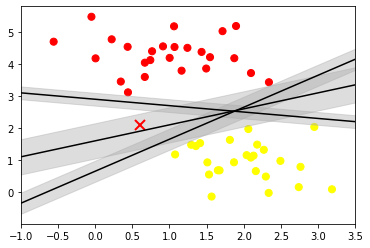

In [1]:
import sklearn
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2, random_state =0, cluster_std=0.6)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b, d, in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit -d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

### <font size=4, color=blue>**An Example**</font>

In [19]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [268]:
def plot_svc_decision_function(model, ax = None, plot_support = True):
    '''plot the decision function for a two-demisional svc'''
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['dashed', 'solid', 'dashed'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s = 300, linewidths = 1, facecolors = 'none', edgecolors = 'black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

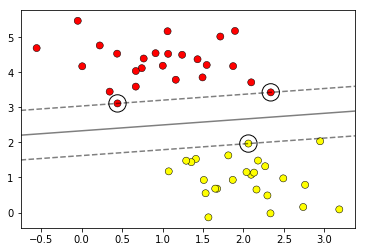

In [60]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolors = 'black', linewidths = 0.5)
plot_svc_decision_function(model)

#### <font size =4, color=brown>**Different SVM boundary by different sampling**</font>

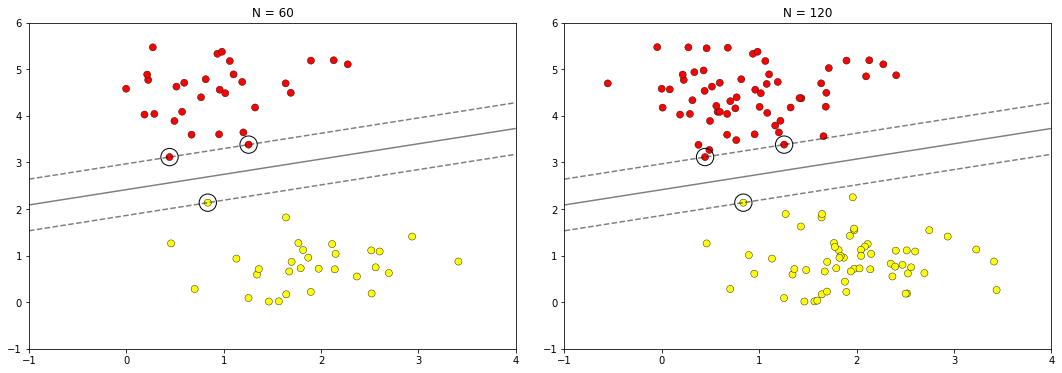

In [64]:
def plot_svm(N=10, ax = None):
    X, y = make_blobs(n_samples = 200, centers = 2,
                      random_state = 0, cluster_std = 0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel = 'linear', C = 1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', linewidths = 0.4, edgecolors ='black')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

#### <font size =4, color=brown>**Interactive Widgets if Notebook is live**</font>

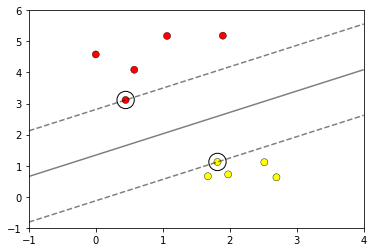

<function __main__.plot_svm(N=10, ax=None)>

In [65]:
from ipywidgets import interact, fixed
interact(plot_svm, N = [10, 200], ax = fixed(None))

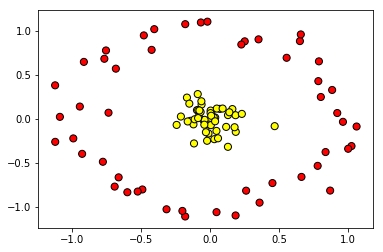

In [260]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor = 0.1, noise = 0.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor='black')

# introduce the 3rd vaible (axis)
r = np.exp(-(X**2).sum(1))

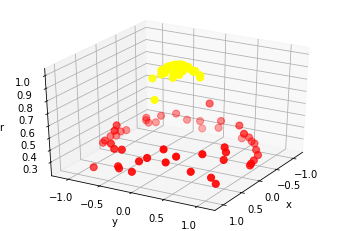

In [266]:
from mpl_toolkits import mplot3d

def plot_3D(elev = 30, azim =  30, X = X, y = y):
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = 'autumn')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev = (-90, 90), azip = (-180, 180), X = fixed(X), y = fixed(y));

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


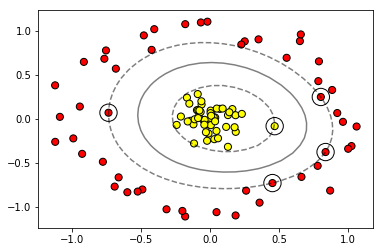

In [269]:
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor = 'black')
plot_svc_decision_function(clf)

<h2><font size = 4.5>Table of Content</font></h2>

<hr>
<div class="alert alert-block alert-info" style="margin-top: 10px">
<li><a href="#ref1">1. Linear SVM Classification</a>
<ul><div><a href="#ref2">1.1 Soft Margin Classification</a></div></ul></li>
    
<li><a href="#ref3">2. Nonlinear SVM Classification</a></li>
    
<li><a href="#ref4">3. Polynomial Kernel</a></li>
    
<li><a href="#ref5">4. Adding Similarity Features</a>
<ul><div><a href="#ref6">4.1 Gaussian RBF Kernel</a></div>
<div><a href="#ref7">4.2 Computational Complexity</a></div></ul></li>

<li><a href="#ref8">5. SVM Regression</a></li>

<li><a href="#ref9">6. Under the Hood</a></li>
<hr>

<a id="ref1"></a>
### 1. Linear SVM Classification (_linearly separable_)
* The SVM is sensitive to scaling; using StandardScaler prior to SVM
* Hard Margin vs Soft Margin Classification
* Hard Margin classification is sensitive to outliers

<a id="ref2"></a>
#### 1.1 Soft Margin Classification (_more flexible_)
* A good balance between keeping as large separation as possible and limiting the margin violations
* Scikit-Learn's SVM uses C hyperparameter:
  * smaller C: wider separation but more margin violations
  * large C: narrower separation but less margin violations
  * **by regularizing C to reduce the SVM model overfitting**

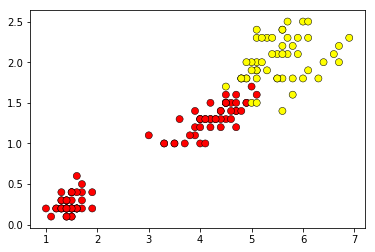

In [252]:
# EXAMPLE
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge')), # === SVC(kernal = 'linear', C = 1) ---> much slower if you have huge dataset
    ))

svm_clf.fit(X, y)

svm_clf.predict([[5.5, 1.7]])

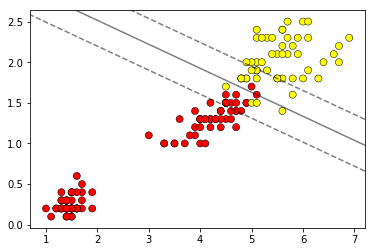

In [255]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolors = 'black', linewidths = 0.5)
plot_svc_decision_function(svm_clf, plot_support = False)

#### IMPORTANT NOTE:
* no probablties for each class as Logistic Regression
* LinearSVC regularize the bias term $\Longrightarrow$ center the training set first by subtracting its mean $\Longrightarrow$ automatically done by StandardScaler
* set the 'loss' hyperparameter to 'hinge'
* set 'dual' hyperparameter to 'False' unless more features than training instances

<a id="ref3"></a>
### 2. Nonlinear SVM Classification
* By adding features (e.g., polynomial features) to make nonlinear datasets separable

In [198]:
# EXAMPLE
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

moons = make_moons(n_samples = 100, noise = 0.25, random_state = 0)
X = moons[0]
y = moons[1]

polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss = 'hinge'))
    ))

polynomial_svm_clf.fit(X, y)

print(polynomial_svm_clf.predict([[5.5, 1.7]]))

[1]


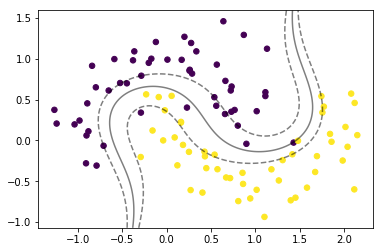

In [203]:
plt.scatter(X[:, 0], X[:, 1], c=y, s= 30)
plot_svc_decision_function(polynomial_svm_clf, plot_support = False)

<a id="ref4"></a>
### 3. Polynomial Kernel (kernal trick)
* Overfitting $\Longrightarrow$ Reducing the degree; 
* coef0 controls how much the model is influenced by high- vs. low-degree polynomial
* Using grid search to find the right hyperparameter values

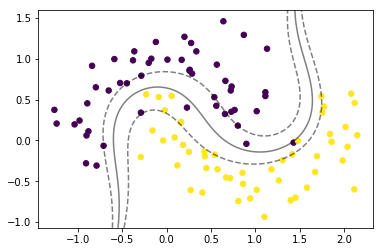

In [205]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

poly_kernal_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5))
    ))

poly_kernal_svm_clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s= 30)
plot_svc_decision_function(poly_kernal_svm_clf, plot_support = False)

<a id="ref5"></a>
### 4. Adding Similarity Features
* using _similarity function_ that meausures how much each instance resembles a particular _landmark_
* Similarity Function $\Longrightarrow$  <font color ='green'> Gaussian _Radial Basis Function (RBF)_ </font>

$$ \phi\gamma(x,\ell) = exp(-\gamma\parallel x-\ell\parallel^2)$$

#### Example: One-dimensional dataset 
* Add two landmark to it at $x_1 =-2$, and $x_1=1$
* Define the $\gamma =0.3$, the values of function ranging from 0 to 1
* Take the instance $x_1= -1$ for example, it is at a distance of 1 from landmark '-2' and 2 from the landmark '1'.

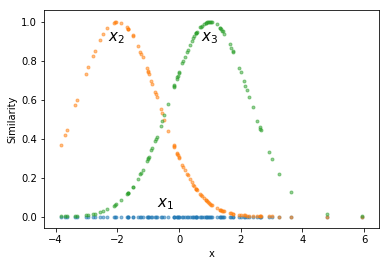

In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.3
ls = [-2, 1]
x1 =2*np.random.randn(100)
y0 = np.zeros(100)
x2 = []
x3 = []

def gaussin_RBF_function(gamma, x, l):
    y = math.exp(-gamma*abs(x-l)**2)
    return y

for x in x1:
    temp1 = gaussin_RBF_function(0.3, x, ls[0])
    x2.append(temp1)
    temp2 = gaussin_RBF_function(0.3, x, ls[1])
    x3.append(temp2)

plt.scatter(x1, y0, marker = '.', alpha= 0.5)  # orignal x1 = -1
plt.scatter(x1, x2, marker = '.', alpha= 0.5)  # landmark -2
plt.scatter(x1, x3, marker = '.', alpha= 0.5)  # landmark 1

plt.text(-0.7, 0.05, r'$x_1$', fontsize = 15)
plt.text(-2.3, 0.9, r'$x_2$', fontsize = 15)
plt.text(0.7, 0.9, r'$x_3$', fontsize = 15)
         
plt.xlabel('x')
plt.ylabel('Similarity')

plt.show()

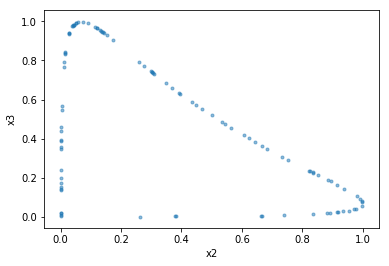

In [7]:
plt.scatter(x2, x3, marker = '.', alpha= 0.5) # transformed dataset (dropping othe original features x1), now it is linearly separable. Each point is phi(x)
plt.xlabel('x2')
plt.ylabel('x3')
plt.show()

### <font color ='red'>How to create a landmark:</font> at the location of each and every instance in the dataset
* <font color ='blue'>Creating many dimensions and thus increase the changes that the transformed training set will be linearly separable.</font>
* <font color ='blue'>m instances, n features $\Longrightarrow$ m instances, m features </font>

<a id="ref6"></a>
### 4.1 Gaussian RBF Kernel
* <font color = 'blue'> It is expensive to compute all the additonal features:</font> <font color= 'red'> SVM kernel solve the probelm</font>

In [224]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

moons = make_moons(n_samples = 100, noise = 0.25, random_state = 0)
X = moons[0]
y = moons[1]

sscaler =  StandardScaler()
X = sscaler.fit_transform(X)

rbf_clf = SVC(kernel = 'rbf', gamma = 0.3, C = 0.001)
rbf_clf.fit(X, y)

# pipeline processs
rbf_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'rbf', gamma = 0.3, C = 0.001))
    ))

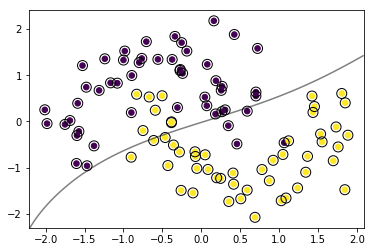

In [225]:
plt.scatter(X[:, 0], X[:, 1], c=y, s= 30)
plot_svc_decision_function(rbf_clf)

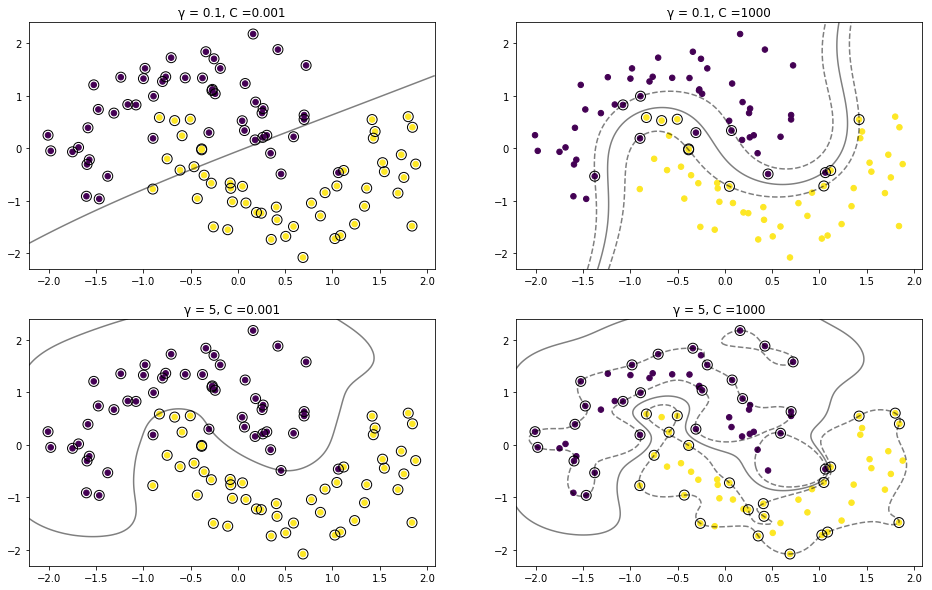

In [251]:
plt.subplots(2, 2, figsize = (16, 10))

for gm, c, n in zip([0.1, 0.1, 5, 5], [0.001, 1000, 0.001, 1000], [1, 2, 3, 4]):
    rbf_clf = SVC(kernel='rbf', gamma=gm, C=c)
    rbf_clf.fit(X, y)
    plt.subplot(2, 2, n)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
    plot_svc_decision_function(rbf_clf)
    plt.title('\u03B3 = {0}'.format(gm) + ', C ={0}'.format(c))

<a id="ref7"></a>
### 4.2 Computational Complexity
* LinearSVC class is based on the <font color ='blue'>___liblinear___</font> $\Longrightarrow$ <font color ='red'>NOT</font> support the kernal trick
* the high precision is controlled by the tolerance hyperparameter $\epsilon$
* SVC class is based on the <font color ='blue'>___libsvm___</font> library $\Longrightarrow$ support the kernel trick $\Longrightarrow$ dreadfully slow
* perfect for complex bust small or mediam trainiing sets
* Scales well with the number of the features $\Longrightarrow$ particularly <font color ='red'>sparse features</font>

|Class| Time complexity|Out-of-core support|Scaling required|Kernel trick|
|:----|:-------------:|:----------------:|:---------:|:------:|
|LinearSVC|0(_m $\times$ n_)|No|Yes|No|
|SGDClassifer|0(_m $\times$ n_)|Yes|Yes|No|
|SVC|0(_$m^2$ $\times$ n_) to 0(_$m^3$ $\times$ n_)|No|Yes|Yes|

<a id="ref8"></a>
### 5. SVM Regression
* **Support Linear + NonLinear Classification <font color='orange'>AND</font> Linear + Nonlinear Regression**
* Contrary to fit the largest possible street between two classes to limit margin vilations, SVM Regression tries to fit as many instance as possibleon the strreen while limiting the margin violations
* The width of the street is controlled by a hyperparameter $\epsilon$

In [196]:
# For the Linear Model
from sklearn.svm import LinearSVR

moons = make_moons(n_samples = 100, noise = 0.25, random_state = 0)
X = moons[0]
y = moons[1]

sscaler =  StandardScaler()
X = sscaler.fit_transform(X)

epsilons = [0.5, 1.5]

for e in epsilons:
    svm_reg = LinearSVR(epsilon = e) 
    svm_reg.fit(X, y)

In [207]:
# For the nonlinear model, a kernalized SVM model will be implemented.
from sklearn.svm import SVR
svm_poly_reg =  SVR(kernel='poly', degree = 2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

* **<font color='red'>SVMs can be used to detect the outlier (See Scikit-Learn's documents)</font>**

<a id="ref9"></a>
### *<font color ='red'>6. Under the Hood</font>* –– **<font color='brow'>How SVM make predicitons and how their training algorithms work</font>**
<br>
* New convention: _b_ will be the bias term and **w** will be the feature weights vector
* Instead of the bias term $\theta_0$, the input feature weights $\theta_1$ to $\theta_n$, and adding bias input $x_0$ = 1. 

#### The linear SVM classifer model predicts te class of a new instance **x** by computing the decision funtion:
$$ \mathbf{w}^T\cdot{\mathbf{x}} + b =  w_1x_1 + \dots + w_nx_n + b$$

Linear SVM Classifer Prediction

$$
\begin{equation}
   \hat{y} =\left\{
   \begin{array}{@{}ll@{}}
      0 & \text{if } \mathbf{w}^T\cdot{x} + b < 0, \\
      1 & \text{if } \mathbf{w}^T\cdot{x} + b \geq{0}
   \end{array}\right.
\end{equation}
$$

#### **6.1 Training Objective**
* The slope of the decision function $\Longrightarrow$ the norm of the weight vector $\parallel{\mathbf{w}}\parallel$.
* If the slope is divided by 2 the points where the decision function is equal to $\pm$1 are going to be twice as far away from the decision boundary; <font color='red'>in other words, dividing the slope by 2 will multipy the margin by 2.</font>
* The smaller the weight vector $\mathbf{w}$, the larger the margin

#### 6.1.1 Hard Margin
* To avoid any margin violations (<font color='red'>hard margin</font>), the decision funciton should be greater than 1 for all positive training instances, and lower than -1 for negative training instances.
* If we define 

$$
\begin{equation}
   t^{(i)} =\left\{
   \begin{array}{@{}ll@{}}
      -1 & \text{if } y^{(i)} = 0, \\
      1 & \text{if } y^{(i)} = 1
   \end{array}\right.
\end{equation}
$$

Then this constaint can be expressed as belowe for all instances:
$$ t^{(i)}(\mathbf{w}^T\cdot{\mathbf{x}^{(i)}} + b) \geq{1}$$

Therefore, the hard margin linear SVM classifier objective can be expressed as the contrained optimization in the equation below:
$$ minimize_{w, b} \frac{1}{2}\mathbf{w}^T\cdot{\mathbf{w}} = \frac{1}{2}\parallel{\mathbf{w}}\parallel^2$$
subject to $$ t^{(i)}(\mathbf{w}^T\cdot{\mathbf{x}^{(i)}} + b) \geq{1}\text{ for } i=1,2,\dots, m$$

#### 6.1.2 Soft Margin
* Adding a slack variable <font color='red'>$\zeta^{(i)}\geq{0}$</font>, which measures how much the $i^{(th)}$ instance is allowed to violate the margin, for each instance;
* Conflict variables: smaller $\zeta^{(i)}\Longrightarrow$reducing margin violations; smaller $\frac{1}{2}\parallel{\mathbf{w}}\parallel^2\Longrightarrow$increasing the margin
* Hyperparameter C: defining the trade-off between $\zeta^{(i)}$ and $\frac{1}{2}\parallel{\mathbf{w}}\parallel^2$

So the soft margin linear SVM classifier objective
$$ minimize_{w, b} \frac{1}{2}\mathbf{w}^T\cdot{\mathbf{w}} = \frac{1}{2}\parallel{\mathbf{w}}\parallel^2+C\sum_{i=1}^{m}\zeta^{(i)}$$
subject to $$ t^{(i)}(\mathbf{w}^T\cdot{\mathbf{x}^{(i)}} + b) \geq{1-\zeta^{(i)}}\text{ and }\zeta^{(i)}\geq{0}\text{ for } i=1,2,\dots, m$$

#### **6.2 Quadratic Programming**
* Problem

$$ miniize_p   \frac{1}{2}\mathbf{p}^T\cdot\mathbf{H}\cdot\mathbf{p} + \mathbf{f}^T\cdot\mathbf{p}$$
subject to$$\mathbf{A}\cdot\mathbf{p}\leq\mathbf{b}$$
$$\mathbf{where}
  \begin{cases}
    \mathbf{p}& \text{is an } n_p\text{-dimensional vector (} n_p\text{ = number of parameters),}\\
    \mathbf{H}  & \text{is an } n_p\times{n_p}\text{matrix,}\\
    \mathbf{f}  & \text{is an } n_p\text{-dimensional vector,}\\
    \mathbf{A} & \text{is an }n_c\times{n_p}\text{matrix (} n_c\text{=number of constrains),}\\
    \mathbf{b} & \text{is an }n_c\text{-dimensional vector.}
  \end{cases}
$$

* <font color =red, size =5>Note:</font> $\mathbf{A}\cdot{\mathbf{p}}\leq{\mathbf{b}}\text{ defines }n_c \text{constraints:}$
$$\mathbf{p}^T\cdot{\mathbf{a}^{(i)}}\leq{b^{(i)}}\text{ for i = 1,2,}\dots{n_c},$$
* $\mathbf{a}^{(i)}$: a vector containing the elements of the $i^{th}$ row of $\mathbf{A}$;
* $b^{(i)}$ is the $i^{th}$ element of $\mathbf{b}$.

<h2 align=center><font size=4, color =orange>More details of this can be found in the book</font></h2>

#### **6.3 The Dual Problem**
* Dual form of the linear SVM objective
$$\text{minimize}_\alpha\frac{1}{2}\displaystyle\sum_{i=1}^{m}\displaystyle\sum_{j=1}^{m}\alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}{x^{(i)}}^T\cdot{x^{(j)}} - \sum_{i=1}^{m}\alpha^{(i)}$$

* Computing the bias term using the kernel trick
$$\hat{b} = \frac{1}{n_s}
  \sum_{\substack{
   i=1 \\
   \hat{a}^{(i)}>0
  }}^{m}
  \Big(1-t^{(i)}\hat{\mathbf{w}}^T\cdot{\phi}\Big(\mathbf{x}^{(i)}\Big)\Big) 
  = 
  \frac{1}{n_s}
  \sum_{\substack{
   i=1 \\
   \hat{a}^{(i)}>0
  }}^{m}
  \Bigg(1-t^{(i)}\bigg(\sum_{j=1}^{m}\hat{\alpha}^{(j)}t^{(j)}\phi\Big(\mathbf{x}^{(j)}\Big)\bigg)^T\cdot{\phi}\Big(\mathbf{x}^{(i)}\Big)\Bigg)
  =
  \frac{1}{n_s}
  \sum_{\substack{
   i=1 \\
   \hat{a}^{(i)}>0
  }}^{m}
  \Bigg(1-t^{(i)}
  \sum_{\substack{
  j=1\\
  \hat{a}^{(i)}>0
  }}^{m}\hat{\alpha}^{(j)}t^{(j)}K\Big(\mathbf{x}^{(i)}\text{,}\mathbf{x}^{(j)}\Big)\Bigg)
  $$

#### **6.4 Online SVMs and Mercer's Theorem**

<h2 align=center><font size=4, color =orange>More details of this can be found in the book</font></h2>

### **7. Examples**
#### <font size=4, color=brown>**7.1 Human cell records: benign vs malignant**</font>

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

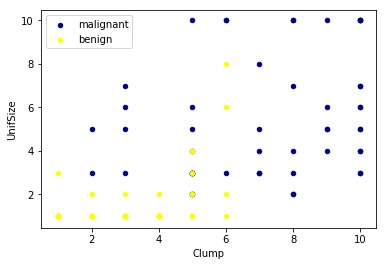

In [5]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', 
                                               y='UnifSize', color='DarkBlue', 
                                               label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', 
                                          y='UnifSize', color='Yellow', 
                                          label='benign', ax=ax);
plt.show()

The __BareNuc__ column includes some values that are not numerical. We can drop those rows:

In [6]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [8]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 
                      'SingEpiSize', 'BareNuc', 'BlandChrom', 
                      'NormNucl', 'Mit']]
X = np.asarray(feature_df)

cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])

In [9]:
# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [11]:
# Modeling using the SVM
# 1.Linear
# 2.Polynomial
# 3.Radial basis function (RBF)
# 4.Sigmoid

from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


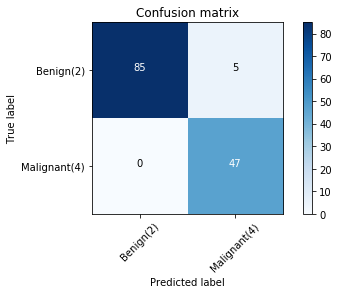

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision = 2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'], normalize= False, title='Confusion matrix')

In [20]:
# f1_score
from sklearn.metrics import f1_score
F1_score = np.round(f1_score(y_test, yhat, average='weighted'), decimals=3)
print('F1 score is',F1_score)

# Jaccard index of accuracy
from sklearn.metrics import jaccard_similarity_score
Jaccard_index = np.round(jaccard_similarity_score(y_test, yhat), decimals=3)
print('Jaccard similarity score is', Jaccard_index)

F1 score is 0.964
Jaccard similarity score is 0.964


#### <font size=4, color=brown>**7.2 Face Recognition**</font>
* #### <font size=4>In a real-world facial recognition, one good option is <font color=red>OpenCV</font> (https://opencv.org)</font>

In [270]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


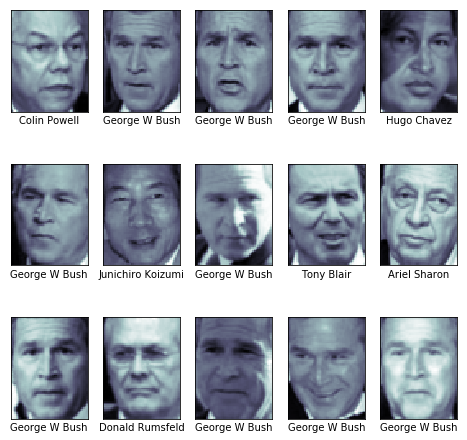

In [275]:
fig, ax = plt.subplots(3, 5, figsize = (8, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks = [], 
            yticks = [], 
            xlabel = faces.target_names[faces.target[i]])

In [283]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

pca = PCA(svd_solver='randomized', n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca, svc)

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, test_size = 0.2, random_state = 42)

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 1min 43s, sys: 544 ms, total: 1min 43s
Wall time: 17.7 s
{'svc__C': 10, 'svc__gamma': 0.005}


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

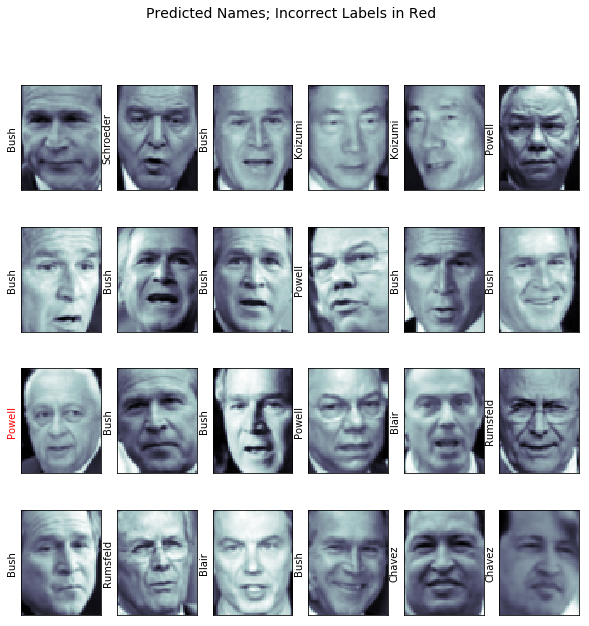

In [286]:
best_svc_model = grid.best_estimator_
yfit = best_svc_model.predict(Xtest)

fig, ax =  plt.subplots(4, 6, figsize = (10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap = 'bone')
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = 'black' if yfit[i] == ytest[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size = 14)

                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.58      0.70        12
     Colin Powell       0.84      0.84      0.84        51
  Donald Rumsfeld       0.91      0.80      0.85        25
    George W Bush       0.79      0.95      0.86        98
Gerhard Schroeder       1.00      0.76      0.86        21
      Hugo Chavez       1.00      0.67      0.80        15
Junichiro Koizumi       1.00      0.70      0.82        10
       Tony Blair       0.89      0.89      0.89        38

        micro avg       0.85      0.85      0.85       270
        macro avg       0.91      0.77      0.83       270
     weighted avg       0.86      0.85      0.85       270



Text(0.5, 1.0, 'Confusion matrix for the Face Recognition')

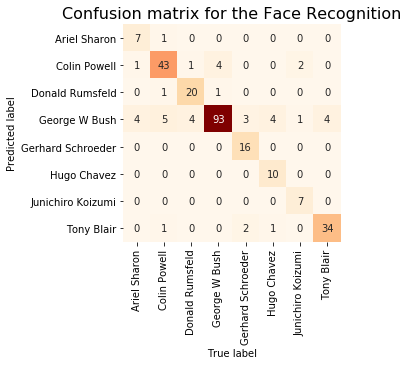

In [291]:
from sklearn.metrics import classification_report
import seaborn as sns

print(classification_report(ytest, yfit, target_names = faces.target_names))

from sklearn.metrics import confusion_matrix
mtx = confusion_matrix(ytest, yfit)
sns.heatmap(mtx.T, square = True, annot = True, fmt = 'd', cbar =False, cmap = 'OrRd',
            xticklabels = faces.target_names,
            yticklabels = faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion matrix for the Face Recognition', size = 16)